## Customized gymnasium environment: `smart-city`

In [1]:
import gymnasium
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym

In [2]:
import mobile_env
# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default configuration
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 666,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.RoundRobin,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 100000000.0,
  'freq': 2500,
  'tx': 40,
  'height': 50,
  'computational_power': 100},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5,
  'snr_tr': 2e-08,
  'noise': 1e-09,
  'velocity': 0,
  'radius': 500,
  'logs': {}},
 'ue_job': {'job_generation_probability': 0.7,
  'communication_job_lambda_value': 2.875,
  'computation_job_lambda_value': 10.0},
 'sensor_job': {'communication_job_lambda_value': 1.125,
  'computation_job_lambda_value': 5.0},
 'e2e_delay_threshold': 5,
 'reward_calculati

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',  # Adjust this if the entry point is different
    kwargs={'config': {}, 'render_mode': None}
)

/home/elifohri/.local/lib/python3.10/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
import gymnasium as gym

# List all registered environments
env_specs = gym.envs.registry.keys()
print(env_specs)

# Verify your specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart_city-smart_city_handler-v0' registered suc

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 15 sensors and 1 cells.


Episode 5 completed.


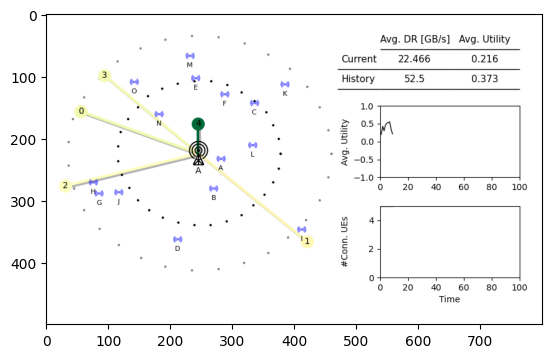

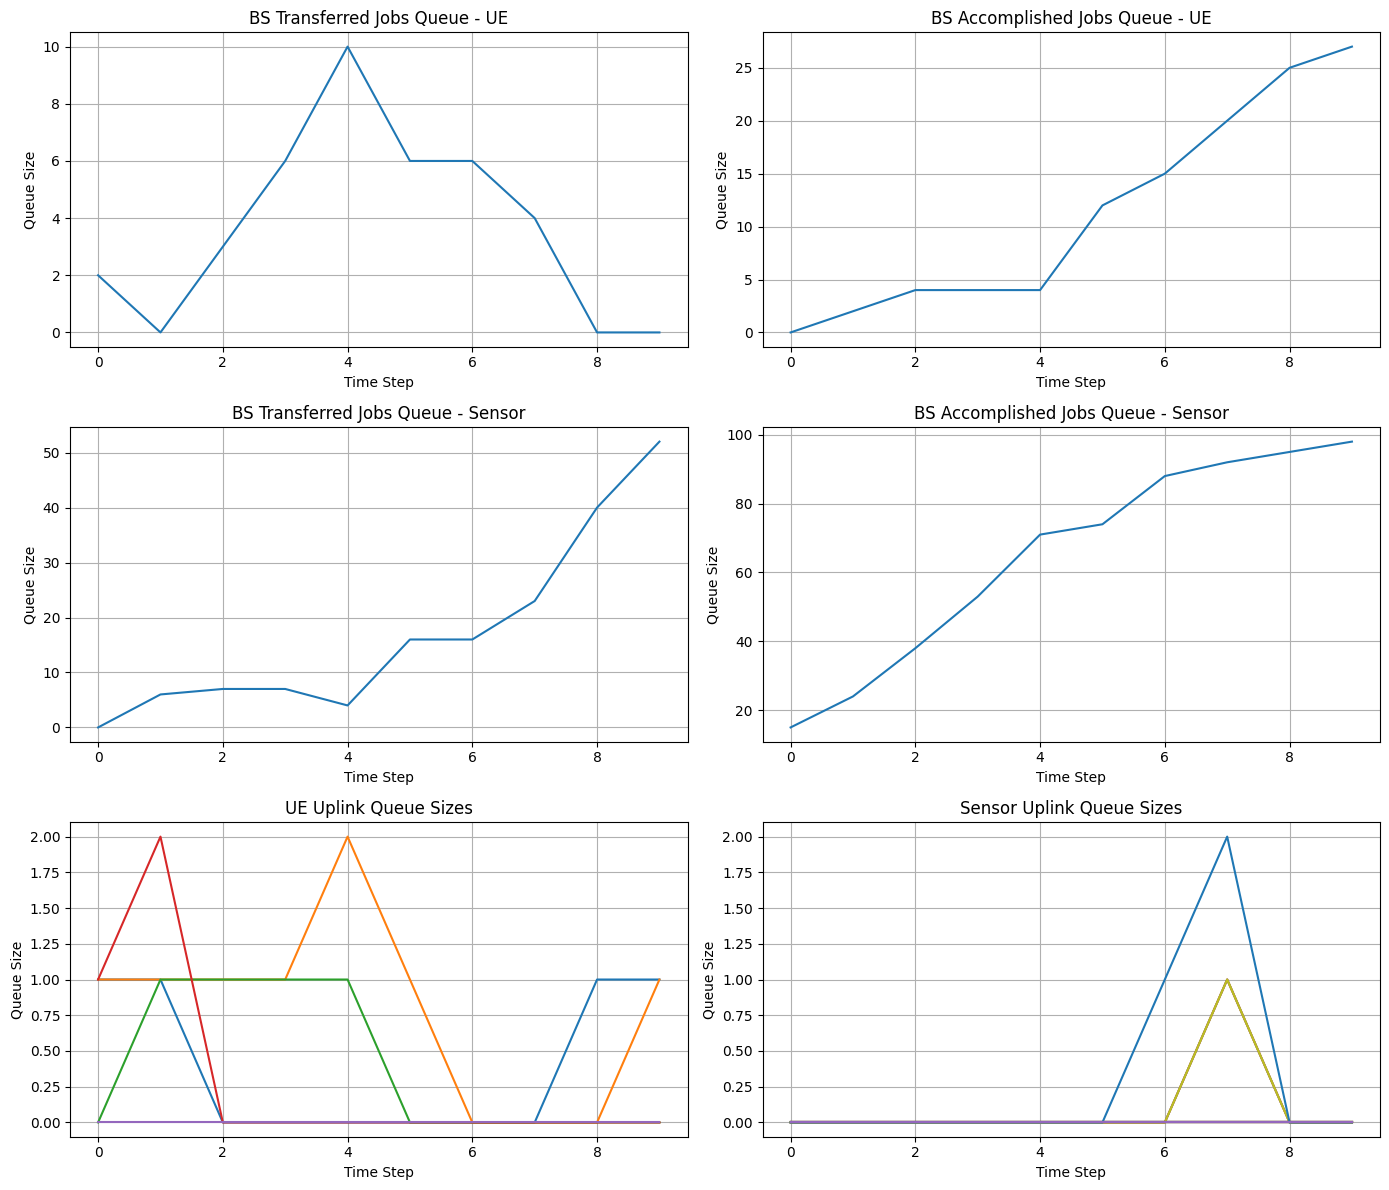

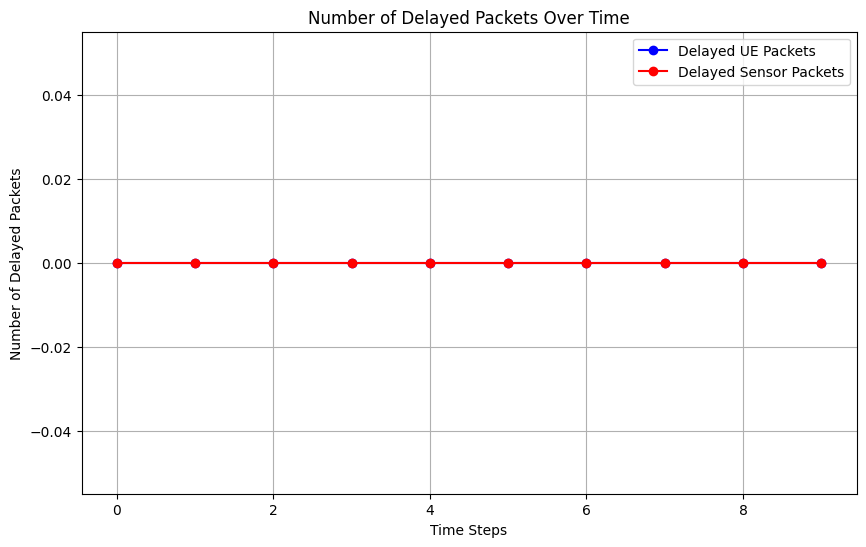

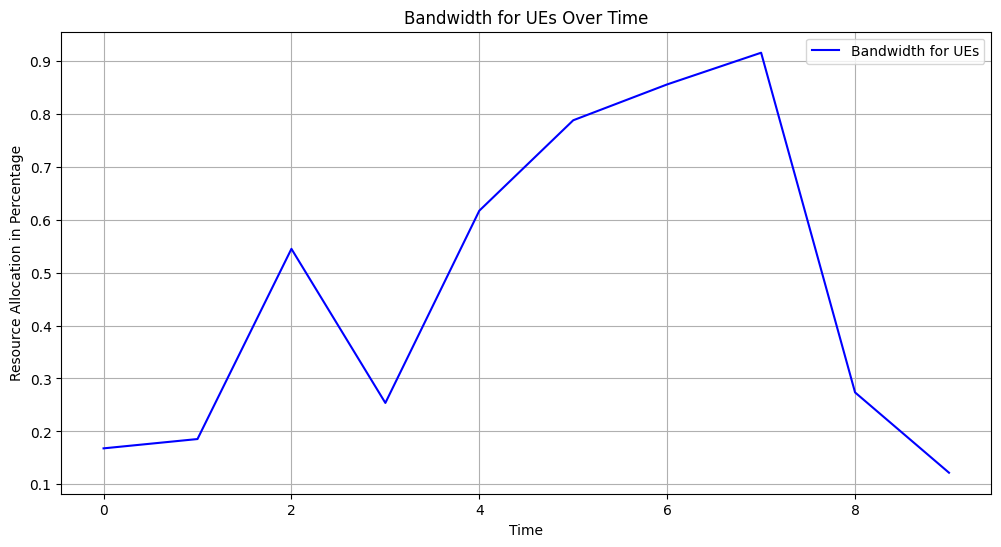

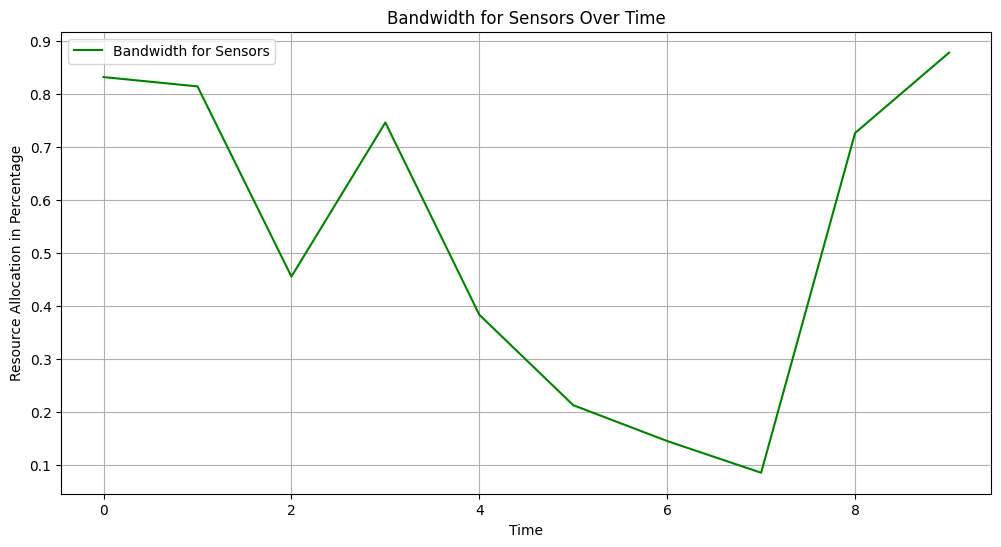

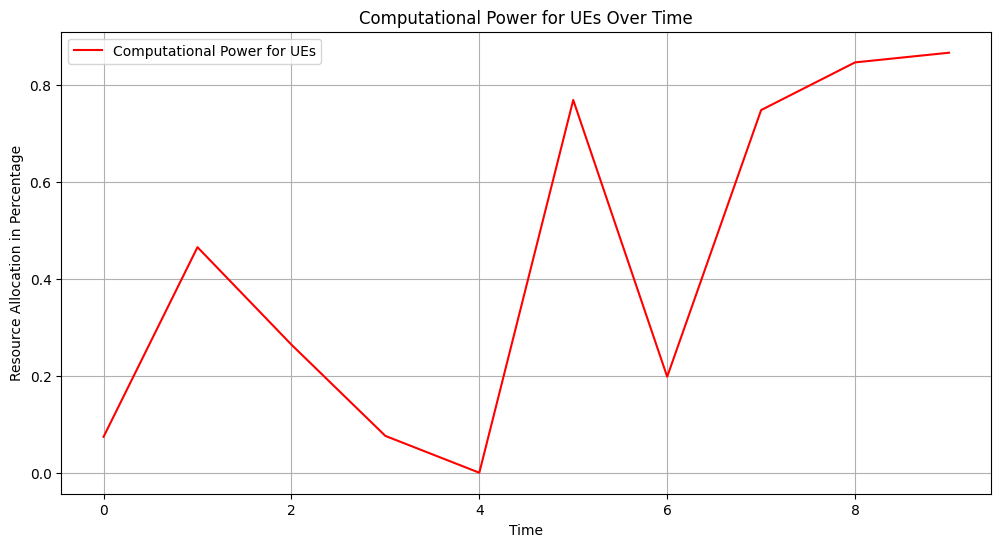

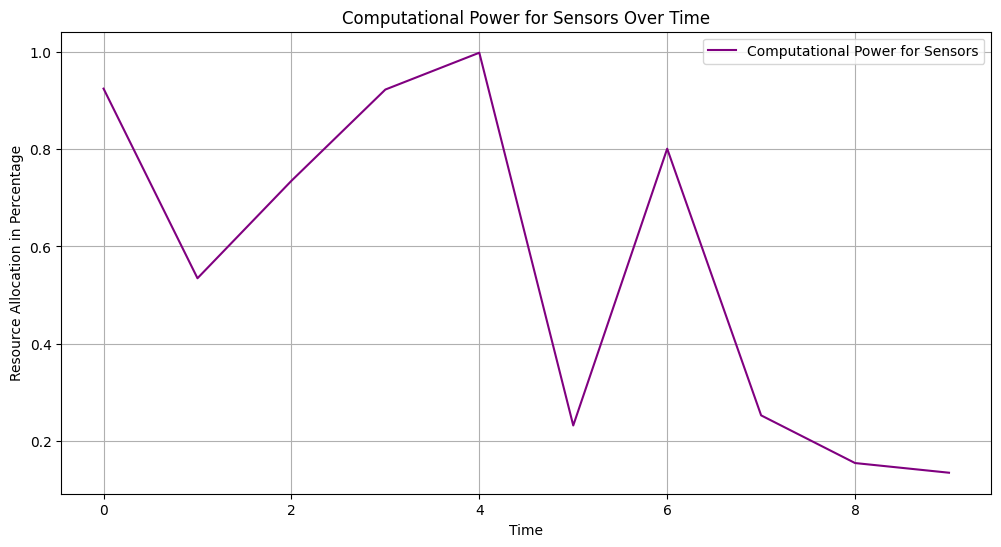

In [6]:
from IPython import display
import matplotlib.pyplot as plt

# Run the simulation for 5 episodes and 10 timesteps per episode
num_episodes = 5
timesteps_per_episode = 10

for episode in range(num_episodes):
    done = False
    obs, info = env.reset()  # Reset the environment at the start of each episode

    for t in range(timesteps_per_episode):
        # Use random dummy actions by sampling from the action space
        dummy_action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(dummy_action)

        # Render the environment
        plt.imshow(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)

        # Check if the episode is over (terminated or truncated)
        if terminated or truncated:
            break

    # Plot results after each episode
    print(f"Episode {episode + 1} completed.")
    
    # Plot queue sizes
    env.plot_queue_sizes()

    # Plot delayed packets
    env.plot_delayed_packets()

    # Plot resource allocations
    env.plot_resource_allocations()

    # Show the plots after each episode
    plt.show()


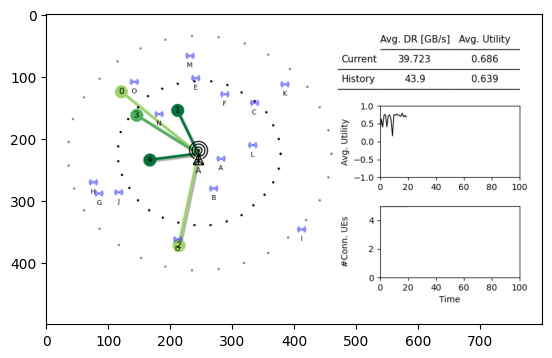

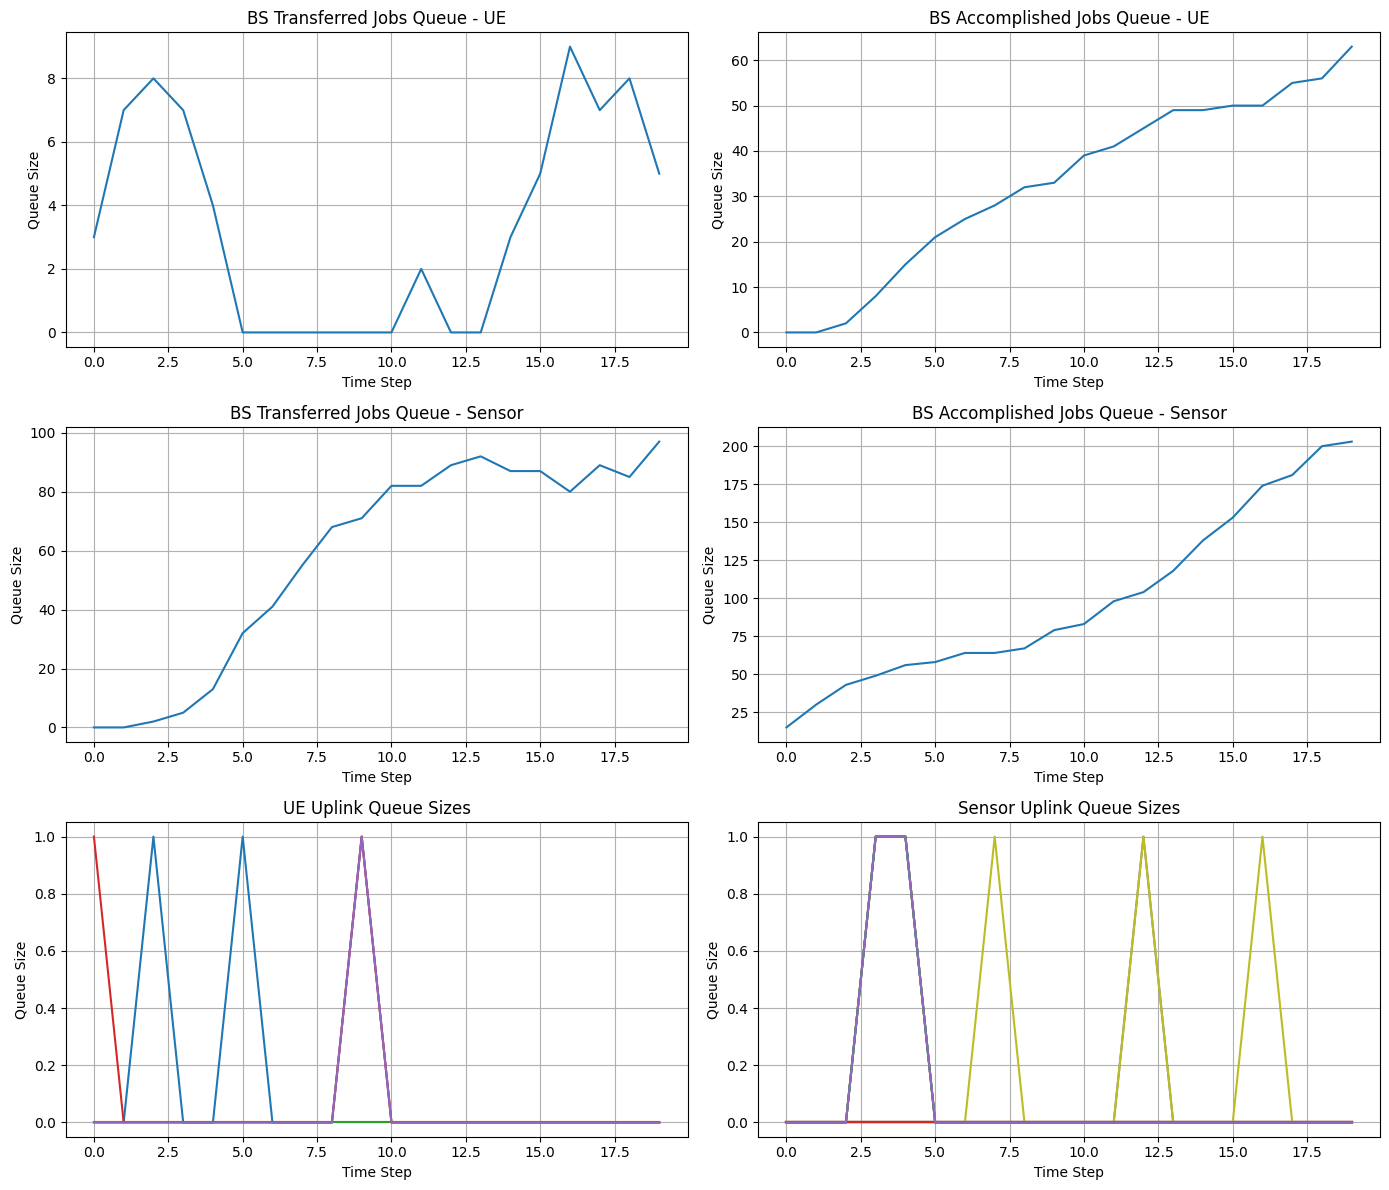

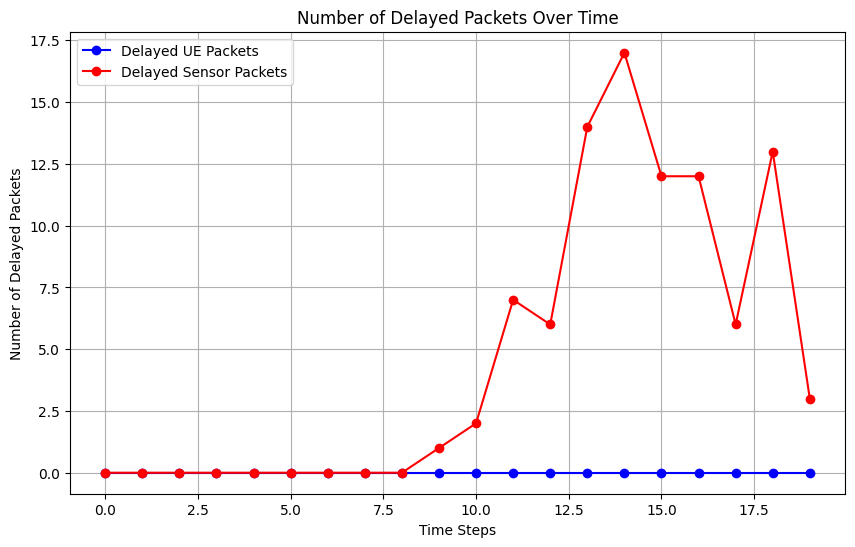

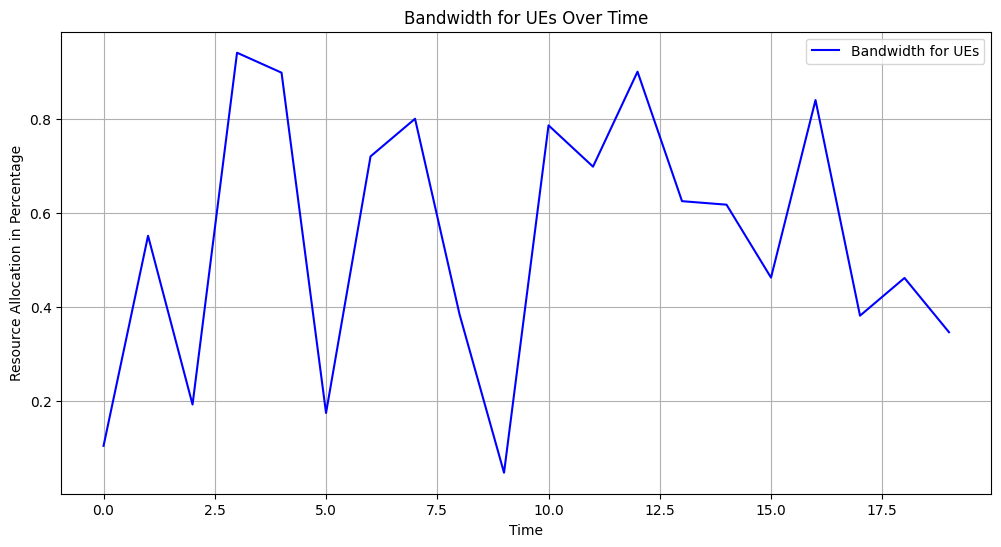

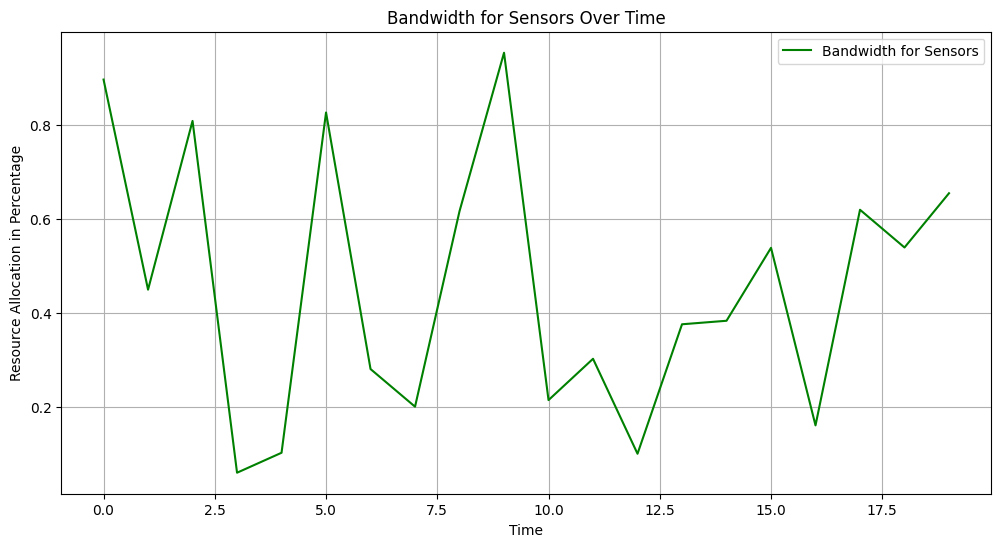

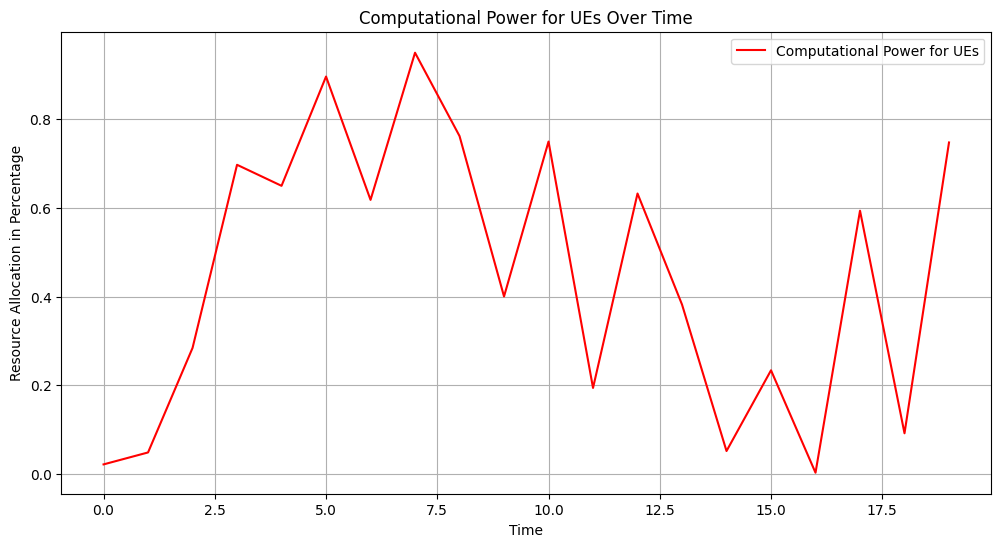

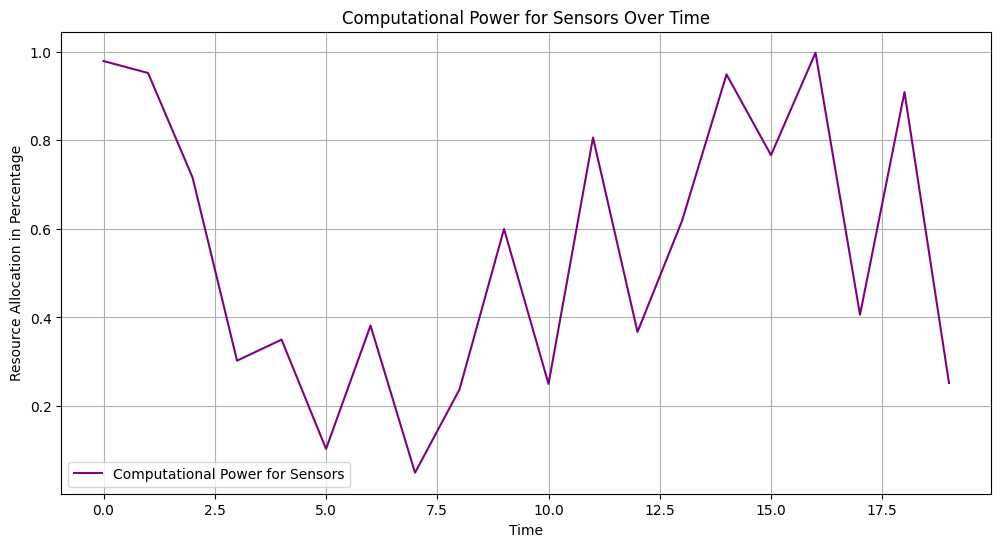

In [7]:
from IPython import display

# run the simulation for 20 time steps
done = False
obs, info = env.reset()
for _ in range(20):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
env.plot_queue_sizes()
env.plot_delayed_packets()
env.plot_resource_allocations()

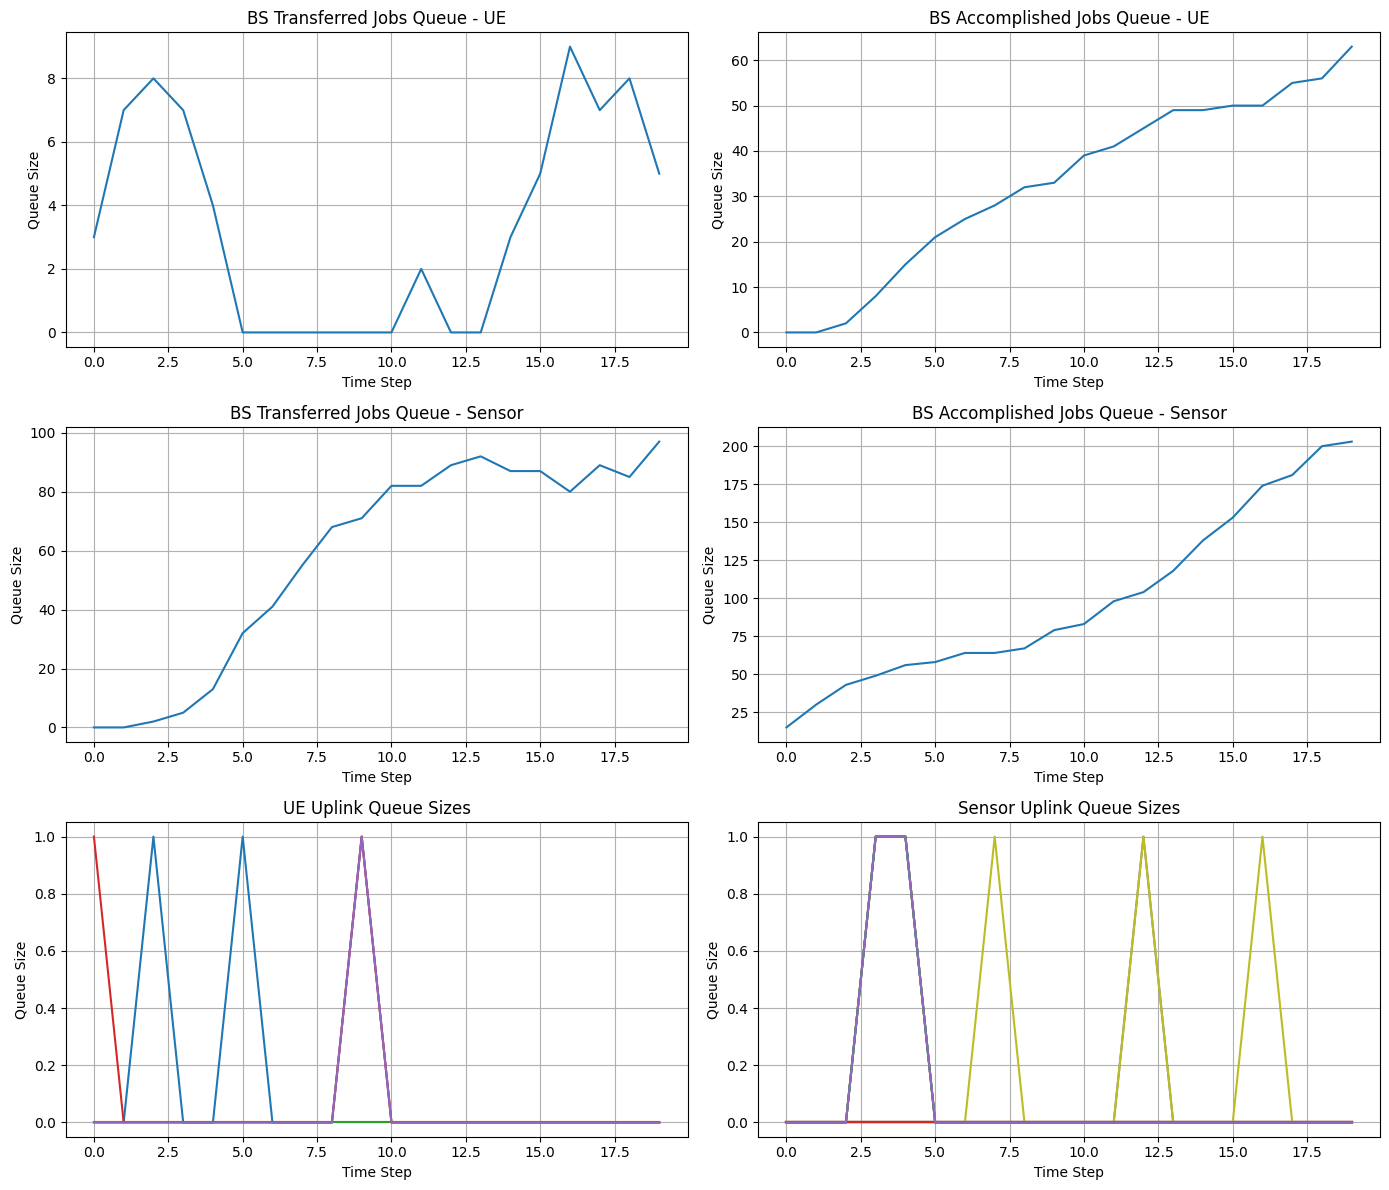

In [8]:
env.plot_queue_sizes()

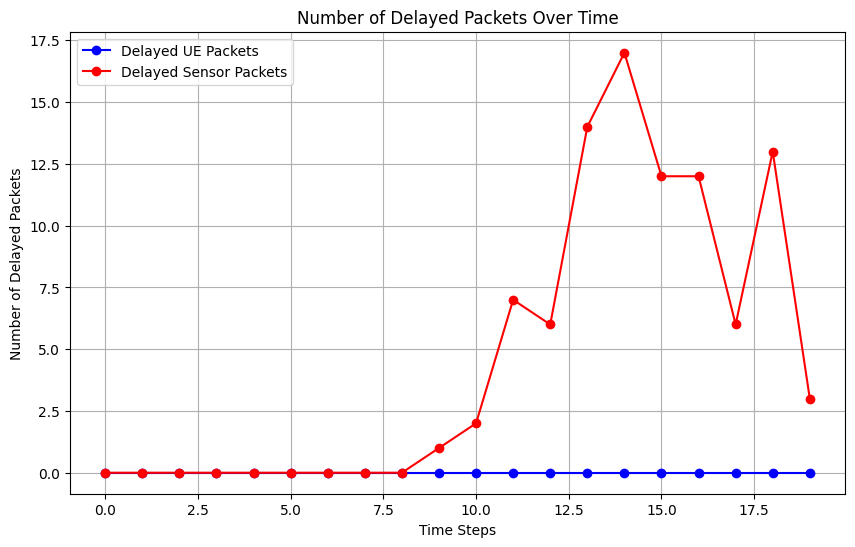

In [9]:
env.plot_delayed_packets()

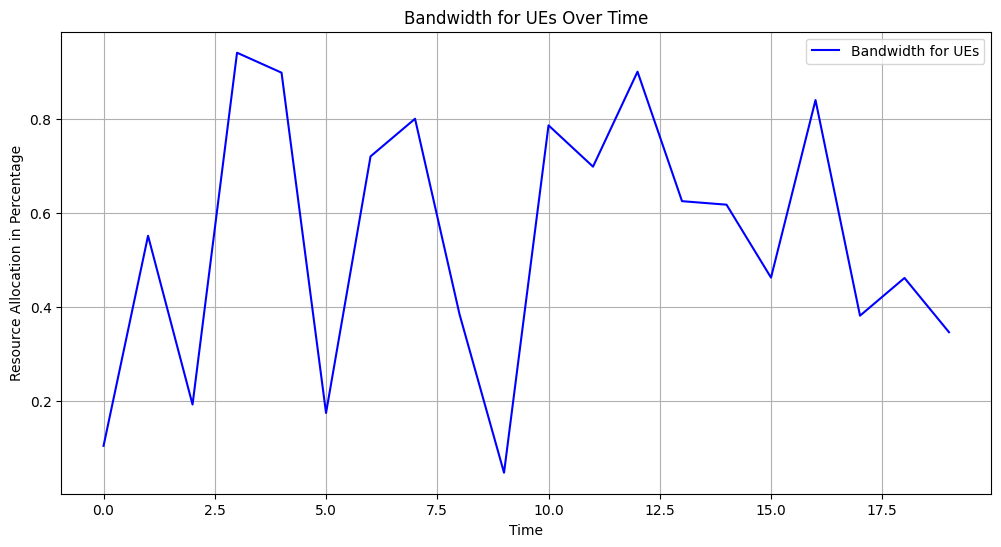

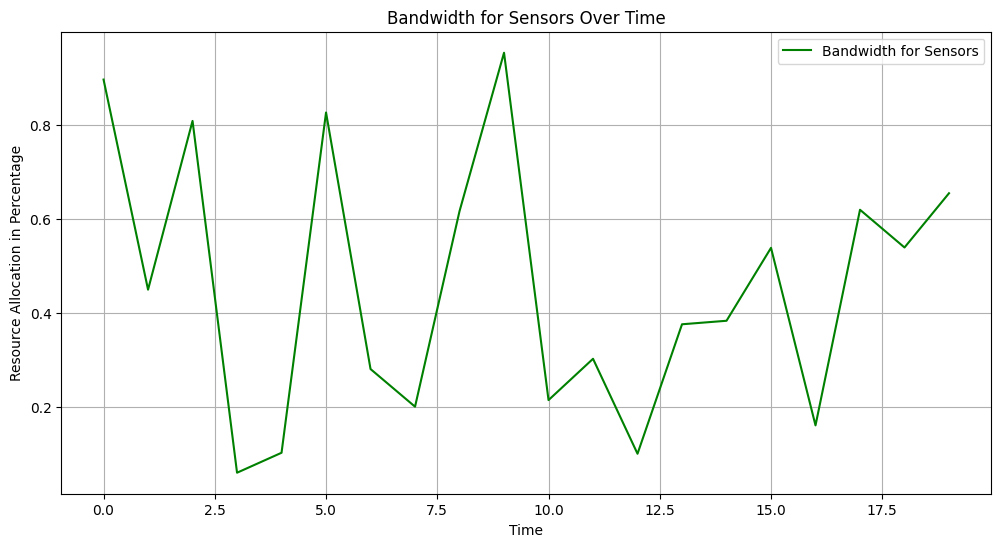

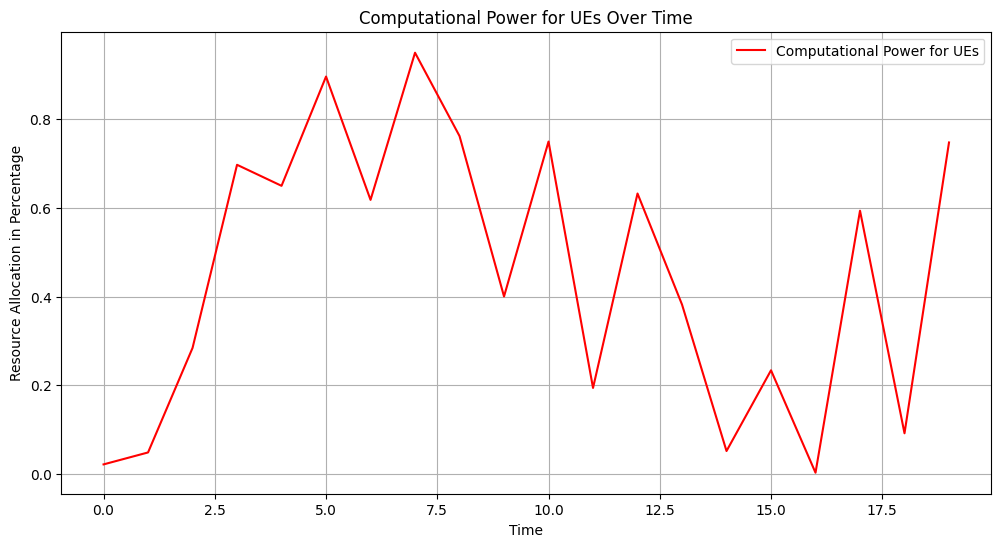

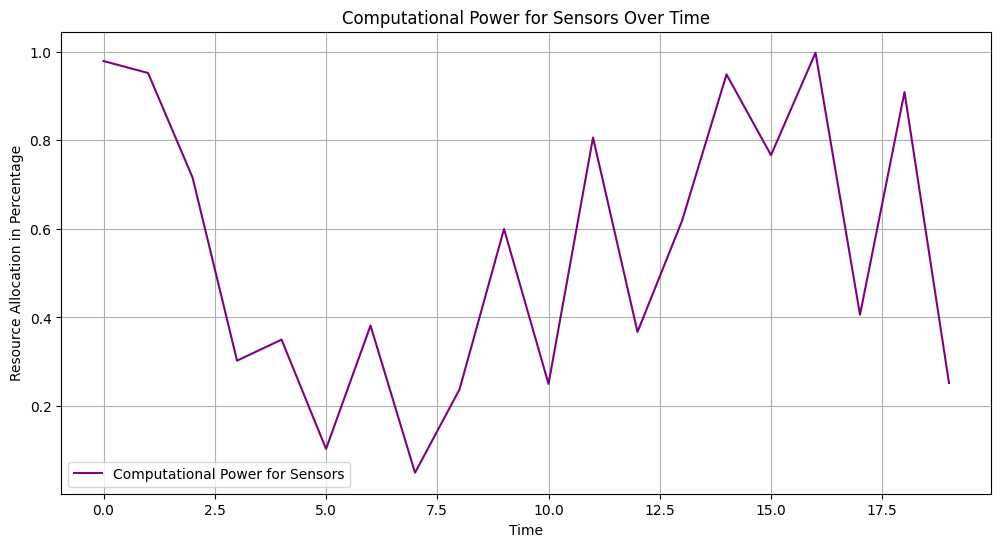

In [10]:
env.plot_resource_allocations()

In [11]:
obs, info = env.reset()
print("obs:", obs)
print("info:", info)

print("\nMetadata")
print("metadata:", env.metadata)

print("\nRender Modes")
print("render modes:", env.render_mode)

print("\nSpec:")
print("spec:", env.spec)

print("\nAction Space")
print("action space:", env.action_space)
print("action space shape:", env.action_space.shape)
print("simple action:", env.action_space.sample())

print("\nObservation Space")
print("observation space:", env.observation_space)
print("observation space shape:", env.observation_space.shape)
print("sample observation:", env.observation_space.sample())

print("\nReward Range")
print("reward range:", env.reward_range)

env.close()

obs: [0. 0. 0. 0. 0. 0.]
info: {}

Metadata
metadata: {'render_modes': ['rgb_array', 'human']}

Render Modes
render modes: rgb_array

Spec:
spec: EnvSpec(id='mobile-smart_city-smart_city_handler-v0', entry_point='mobile_env.scenarios.smart_city:MComSmartCity', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'config': {}, 'render_mode': 'rgb_array'}, namespace=None, name='mobile-smart_city-smart_city_handler', version=0, additional_wrappers=(), vector_entry_point=None)

Action Space
action space: Box(0.0, 1.0, (2,), float32)
action space shape: (2,)
simple action: [0.7952229  0.46006346]

Observation Space
observation space: Box(-1.0, 1.0, (6,), float32)
observation space shape: (6,)
sample observation: [ 0.24296698 -0.7428709  -0.9945461  -0.7070643   0.73894536 -0.7797184 ]

Reward Range
reward range: (-inf, inf)
